In [1]:
%matplotlib inline
from matplotlib import style ,figure
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station=Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [10]:
Measurement_db=session.query(Measurement).first()
Station_db=session.query(Station).first()

Measurement_db.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2239ff64248>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [11]:
Station_db.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2239ffd93c8>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'longitude': -157.8168}

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results



# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [144]:
# Calculate the date 1 year ago from the last data point in the database
Data_date=session.query(Measurement.date)

Max_date=dt.datetime.strptime(max(Data_date)[0],'%Y-%m-%d')
Min_date=dt.datetime.strptime(min(Data_date)[0],'%Y-%m-%d')
print(Max_date)
print(Min_date)
Last_year=Max_date-dt.timedelta(days=365)
Last_year_date=Last_year.strftime('%Y-%m-%d')
Last_year_date


2017-08-23 00:00:00
2010-01-01 00:00:00


'2016-08-23'

In [14]:
# Perform a query to retrieve the data and precipitation scores

prcp_list=[Measurement.date,Measurement.prcp]
Data_prcp = session.query(*prcp_list).filter(Measurement.date >= Last_year_date).all()

In [15]:

# Save the query results as a Pandas DataFrame and set the index to the date column
Data_prcp_df=pd.DataFrame(Data_prcp)
Data_prcp_df=Data_prcp_df.set_index("date")

# Sort the dataframe by date
Data_prcp_df=Data_prcp_df.sort_values("date")
Data_prcp_df

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


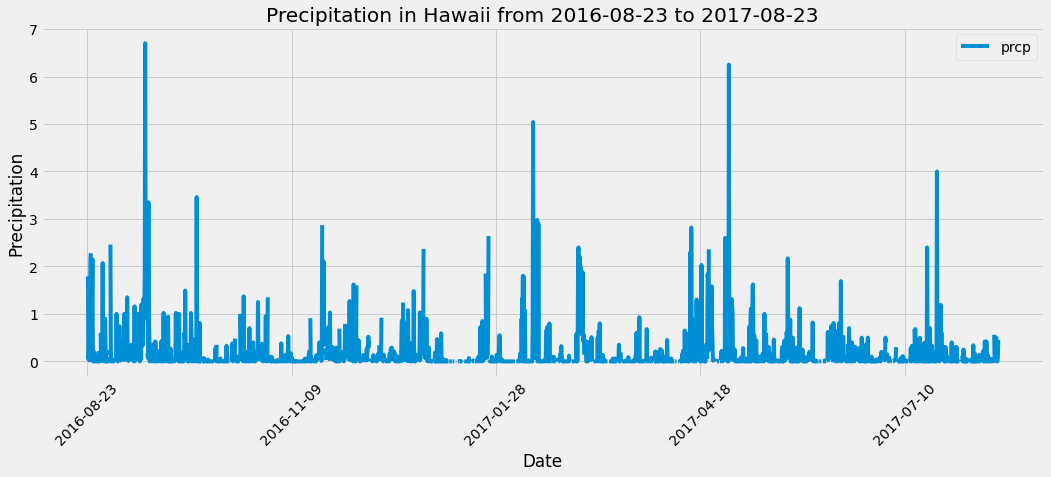

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data

rain_plot = Data_prcp_df.plot(figsize = (16, 6),rot=45)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title(f"Precipitation in Hawaii from {Last_year_date} to {max(Data_date)[0]}")
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Data_prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
Station_data = session.query(Station.station)
Station_data.count()

9

In [40]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Measurement_list=[Measurement.id,Measurement.station,Measurement.date,Measurement.prcp,Measurement.tobs,Station.name]
Measurement_data = session.query(*Measurement_list).filter(Measurement.station == Station.station).all()
Measurement_df=pd.DataFrame(Measurement_data)
Measurement_df
Measurement_df=Measurement_df.set_index("id")
Num_Station=Measurement_df.groupby(["station"]).agg({'station':'max','name':'max','date':'count'})
Num_Station=Num_Station.set_index("station")
Num_Station=Num_Station.rename(columns={"date":"Number_of_Data","name":"Station_Name"})
Num_Station.sort_values("Number_of_Data",ascending='false')

,Station_Name,Number_of_Data
station,,
USC00518838,"UPPER WAHIAWA 874.3, HI US",511
USC00517948,"PEARL CITY, HI US",1372
USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
USC00513117,"KANEOHE 838.1, HI US",2709
USC00519397,"WAIKIKI 717.2, HI US",2724
USC00519281,"WAIHEE 837.5, HI US",2772


In [88]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
Most_active_station_no=Num_Station.Number_of_Data.max()
Most_active_station_no
Most_active_station_id=Num_Station.loc[Num_Station.Number_of_Data==Most_active_station_no].index.tolist()
#Most_active_station_id
Station_ST=pd.DataFrame(Measurement_df.groupby(["station"]).agg({'station':'max','name':'max','tobs':['min','max','mean','count']}))
Station_ST=Station_ST.reset_index(drop=True)
Station_ST.columns =['Station_id','station_name','Min_Temp','Max_Temp','Avg_Temp','Number_of_records']
Station_ST=Station_ST.set_index('Station_id')
Station_ST
Most_Active_Station_ST=Station_ST.loc[ Station_ST.index.isin (Most_active_station_id)]
Most_Active_Station_ST

,station_name,Min_Temp,Max_Temp,Avg_Temp,Number_of_records
Station_id,,,,,
USC00519281,"WAIHEE 837.5, HI US",54.0,85.0,71.663781,2772


In [92]:
# Choose the station with the highest number of temperature observations.
Most_obs_station_no=Station_ST.Number_of_records.max()
Most_obs_station_no
Most_obs_station_id=Station_ST.loc[Station_ST.Number_of_records==Most_obs_station_no].index.tolist()
Most_obs_station_id

['USC00519281']

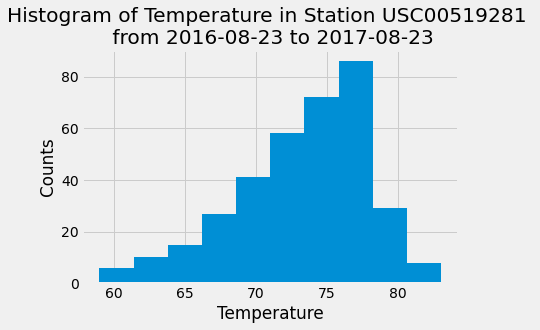

In [112]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Measurement_Station=[Measurement.id,Measurement.station,Measurement.date,Measurement.tobs]
Measurement_Station_data = session.query(*Measurement_Station).filter(Measurement.station == max(Most_obs_station_id)).filter(Measurement.date >= Last_year_date).all()
Measurement_Station_df=pd.DataFrame(Measurement_Station_data)
Measurement_Station_df
plt.hist(Measurement_Station_df.tobs)
plt.xlabel("Temperature")
plt.ylabel("Counts")
N='/n'
plt.title(f"Histogram of Temperature in Station {max(Most_obs_station_id)} \n from {Last_year_date} to {max(Data_date)[0]}")
plt.show()

## Bonus Challenge Assignment

In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [143]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
#print(calc_temps('2012-09-28', '2012-10-05'))
print(calc_temps(start_date="2016-07-20", end_date="2016-08-23"))
K=True
# while (K==True):
#     Start_date=input("Start of your trip '%YYYY-%mm-%dd'")
#     End_date=input("End of your trip '%YYYY-%mm-%dd'")
#     if (End_date>Start_date): K=False
Start_date='2020-10-20'
End_date='2020-10-30'


[(71.0, 78.14285714285714, 83.0)]


In [153]:
Min_date_year=Min_date.year
Max_date_year=Max_date.year

In [204]:
year_temp_list=[]
Trip_df=pd.DataFrame(columns=['year','tmin', 'tavg', 'tmax'])
#print(Trip_df)
for year in range(Min_date_year,Max_date_year):
 #   print(year)
    Data=[]
    Data =calc_temps(start_date=str(year)+(Start_date[-6:]), end_date=str(year)+(End_date[-6:]))
    Trip_df1=pd.DataFrame(Data,columns=['tmin', 'tavg', 'tmax'])
    Trip_df1['year']=year
    #print(Trip_df1)
    Trip_df=Trip_df.append(Trip_df1,ignore_index=True)
Trip_df=Trip_df.set_index("year")
Trip_df

,tmin,tavg,tmax
year,,,
2010,67.0,74.946237,84.0
2011,64.0,73.487500,80.0
2012,68.0,74.864865,82.0
2013,66.0,73.562500,81.0
2014,68.0,76.282051,83.0
2015,64.0,75.545455,82.0
2016,68.0,76.357143,81.0


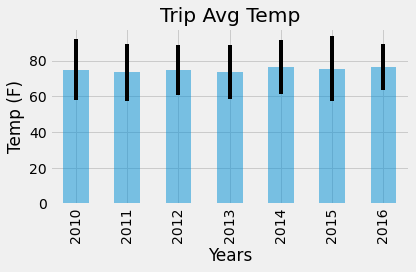

In [217]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
Trip_df.plot.bar(y='tavg',yerr=(Trip_df['tmax'] - Trip_df['tmin']),title='Trip Avg Temp', alpha=0.5)
plt.ylabel("Temp (F)")
plt.xlabel("Years")
plt.tight_layout()
plt.gca().legend_.remove()
plt.show()


In [25]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [26]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [27]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [28]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [29]:
# Plot the daily normals as an area plot with `stacked=False`
